In [ ]:
# Importação das bibliotecas principais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os # Import the os module
warnings.filterwarnings('ignore')

# Configurações para melhor visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chik0di/board-games-dataset-complete-features")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'board-games-dataset-complete-features' dataset.
Path to dataset files: /kaggle/input/board-games-dataset-complete-features


In [ ]:
# Verifica os arquivos dentro da pasta para encontrar o CSV
for file in os.listdir(path):
    print(file)


boardgamegeek.json
boardgame-geek-dataset_organized.csv


In [ ]:
# A-1
csv_path = os.path.join(path, 'boardgame-geek-dataset_organized.csv')
df = pd.read_csv(csv_path)


In [ ]:
# A-2
df.head()

,row_id,boardgame,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,...,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens,url,description
0,1,Brass: Birmingham,2018,2,4,60,120,14,8.575,53548,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/224517/bra...,"Build networks, grow industries, and navigate ..."
1,2,Pandemic Legacy: Season 1,2015,2,4,60,60,13,8.512,56071,...,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/161936/pan...,Mutating diseases are spreading around the wor...
2,3,Ark Nova,2021,1,4,90,150,14,8.539,54528,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/342942/ark...,"Plan and build a modern, scientifically manage..."
3,4,Gloomhaven,2017,1,4,60,120,14,8.557,65443,...,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/174430/glo...,Vanquish monsters with strategic cardplay. Ful...
4,5,Twilight Imperium: Fourth Edition,2017,3,6,240,480,14,8.572,26686,...,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,https://boardgamegeek.com/boardgame/233078/twi...,"Build an intergalactic empire through trade, r..."


In [ ]:
# A-3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   row_id             2000 non-null   int64  
 1   boardgame          2000 non-null   object 
 2   release_year       2000 non-null   int64  
 3   min_players        2000 non-null   int64  
 4   max_players        2000 non-null   int64  
 5   min_playtime       2000 non-null   int64  
 6   max_playtime       2000 non-null   int64  
 7   minimum_age        2000 non-null   int64  
 8   avg_rating         2000 non-null   float64
 9   num_ratings        2000 non-null   int64  
 10  complexity         2000 non-null   float64
 11  rank_overall       2000 non-null   int64  
 12  owned              2000 non-null   int64  
 13  wishlisted         2000 non-null   int64  
 14  total_plays        2000 non-null   int64  
 15  fans               2000 non-null   int64  
 16  page_views         2000 

In [ ]:
# A-4
df.describe()

,row_id,release_year,min_players,max_players,min_playtime,max_playtime,minimum_age,avg_rating,num_ratings,complexity,...,rating_9,rating_10,rank_strategy,rank_thematic,rank_family,rank_war,rank_customizable,rank_abstract,rank_party,rank_childrens
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.00000,1016.000000,393.000000,614.000000,130.000000,49.000000,78.000000,113.000000,17.000000
mean,1000.500000,2010.398500,1.764000,4.944000,57.519000,88.699000,11.342500,7.420455,9244.914000,2.537535,...,1466.396000,685.81400,510.142717,200.852417,309.081433,117.523077,30.326531,46.423077,66.893805,13.941176
std,577.494589,80.765724,0.708911,6.112655,48.646129,89.119614,2.424486,0.439694,13290.743516,0.820470,...,2739.096569,1685.32733,295.999158,120.747749,180.727594,131.097113,22.022136,34.086795,49.065802,9.168360
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,6.457000,735.000000,1.010000,...,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,500.750000,2011.000000,1.000000,4.000000,30.000000,45.000000,10.000000,7.098000,2803.500000,1.970000,...,322.000000,109.00000,254.750000,99.000000,154.250000,34.250000,13.000000,20.250000,29.000000,6.000000
50%,1000.500000,2017.000000,2.000000,4.000000,45.000000,60.000000,12.000000,7.384000,4675.000000,2.450000,...,564.500000,219.00000,507.500000,197.000000,307.000000,74.000000,25.000000,40.500000,58.000000,13.000000
75%,1500.250000,2020.000000,2.000000,5.000000,60.000000,120.000000,14.000000,7.683000,9554.000000,3.080000,...,1300.000000,544.00000,764.250000,294.000000,459.750000,161.250000,44.000000,64.750000,95.000000,21.000000
max,2000.000000,2025.000000,8.000000,100.000000,480.000000,1200.000000,18.000000,9.158000,136478.000000,4.820000,...,34000.000000,25000.00000,1116.000000,501.000000,704.000000,722.000000,93.000000,159.000000,227.000000,29.000000


In [ ]:
# A-5
nota_media = df['avg_rating'].mean()
print(f"Nota média dos jogos: {nota_media:.2f}")

df['avg_playtime'] = (df['min_playtime'] + df['max_playtime']) / 2
tempo_medio = df['avg_playtime'].mean()

print(f"Tempo médio de jogo: {tempo_medio:.2f} minutos")

valores_nulos = df.isnull().sum()
print("\nColunas com valores nulos:")
print(valores_nulos[valores_nulos > 0])

Nota média dos jogos: 7.42
Tempo médio de jogo: 73.11 minutos

Colunas com valores nulos:
amazon_price          882
categories              5
mechanics               3
families               11
designers               3
artists                59
solo_designers       1837
developers           1468
graphic_designers    1357
sculptors            1882
editors              1665
writers              1844
insert_designers     1901
rank_strategy         984
rank_thematic        1607
rank_family          1386
rank_war             1870
rank_customizable    1951
rank_abstract        1922
rank_party           1887
rank_childrens       1983
dtype: int64


In [ ]:
# B-1. Verifica a quantidade de valores nulos na coluna 'average_rating'
nulos = df['avg_rating'].isnull().sum()
print(f"Quantidade de valores nulos em 'avg_rating': {nulos}")

Quantidade de valores nulos em 'avg_rating': 0


In [ ]:
# B-2
# A coluna 'average_rating' não possui valores nulos
# É melhor usar a mediana ao invés da media, pois ela representa o valor central da distribuição e não é afetada por valores extremos

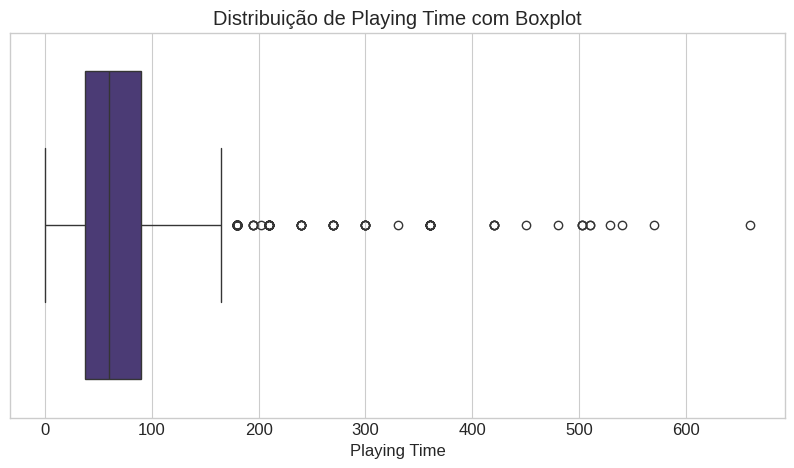

In [ ]:
# B-3
# Boxplot da coluna 'playing_time'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['avg_playtime'])

plt.title('Distribuição de Playing Time com Boxplot')
plt.xlabel('Playing Time')
plt.show()

In [ ]:
# B-4
# Calculando o IQR para 'playing_time'
Q1 = df['avg_playtime'].quantile(0.25)  # Primeiro quartil (25%)
Q3 = df['avg_playtime'].quantile(0.75)  # Terceiro quartil (75%)
IQR = Q3 - Q1

# Limites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrando os outliers
outliers = df[(df['avg_playtime'] < limite_inferior) | (df['avg_playtime'] > limite_superior)]

print(f"IQR: {IQR}")
print(f"Limite inferior: {limite_inferior}")
print(f"Limite superior: {limite_superior}")
print(f"Quantidade de jogos considerados outliers: {len(outliers)}")

IQR: 52.5
Limite inferior: -41.25
Limite superior: 168.75
Quantidade de jogos considerados outliers: 119


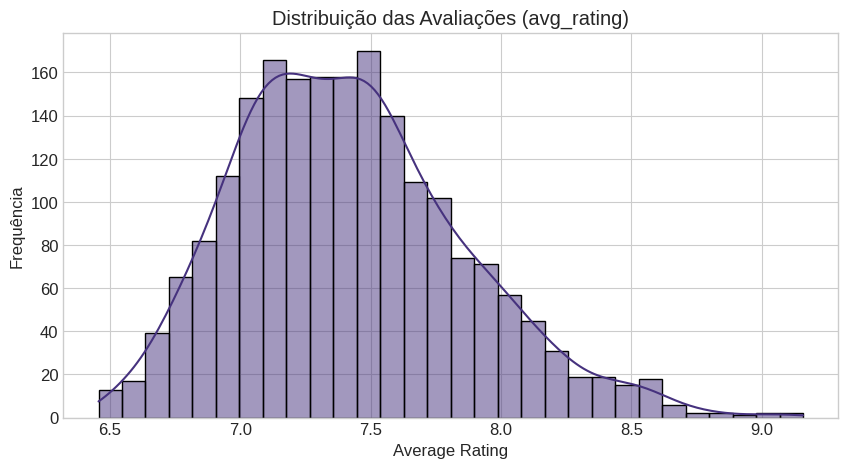

In [ ]:
# C-1
# Histograma da coluna 'average_rating'
plt.figure(figsize=(10, 5))
sns.histplot(df['avg_rating'], bins=30, kde=True)

plt.title('Distribuição das Avaliações (avg_rating)')
plt.xlabel('Average Rating')
plt.ylabel('Frequência')
plt.show()

In [ ]:
# C-2
# Há uma cauda mais longa à direita
# Isso caracteriza uma assimetria positiva

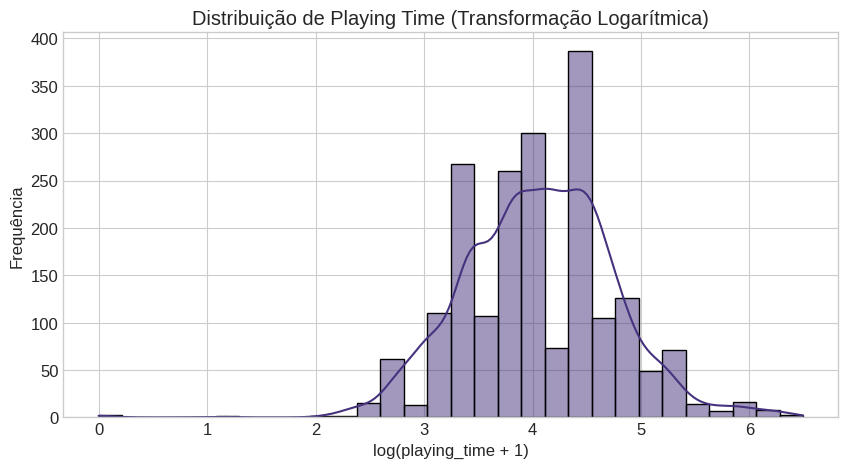

In [ ]:
# C-3
# Cria uma nova coluna com a transformação logarítmica
df['playing_time_log'] = np.log(df['avg_playtime'] + 1)  # +1 para evitar log(0)

# Visualiza com histograma para ver o efeito da transformação
plt.figure(figsize=(10, 5))
sns.histplot(df['playing_time_log'], bins=30, kde=True)

plt.title('Distribuição de Playing Time (Transformação Logarítmica)')
plt.xlabel('log(playing_time + 1)')
plt.ylabel('Frequência')
plt.show()

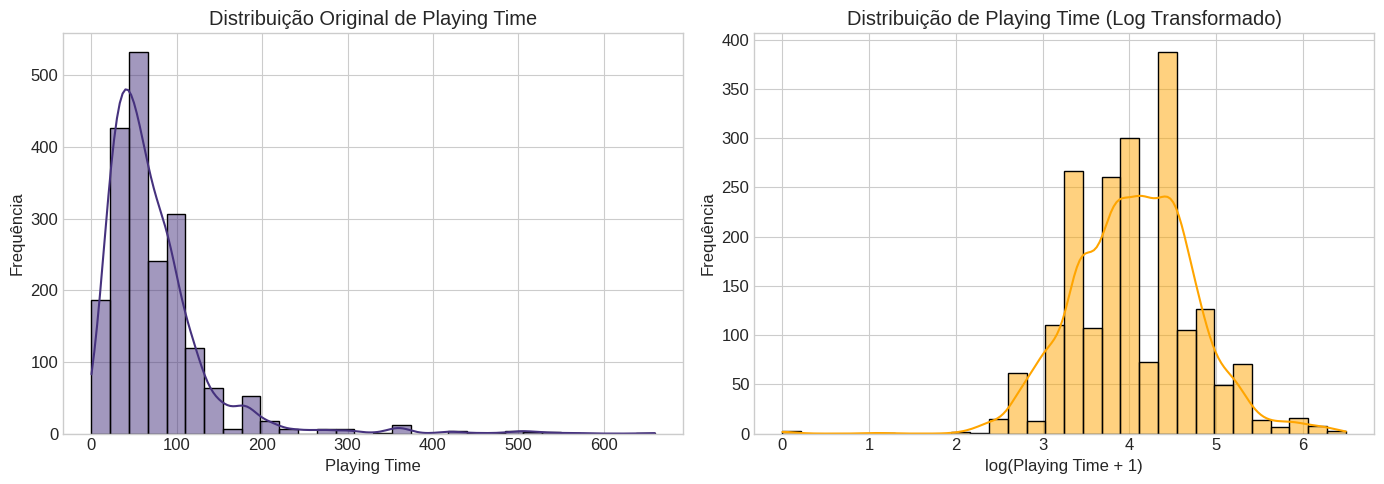

In [ ]:
# C-4
plt.figure(figsize=(14, 5))

# Histograma original
plt.subplot(1, 2, 1)
sns.histplot(df['avg_playtime'], bins=30, kde=True)
plt.title('Distribuição Original de Playing Time')
plt.xlabel('Playing Time')
plt.ylabel('Frequência')

# Histograma após transformação logarítmica
plt.subplot(1, 2, 2)
sns.histplot(df['playing_time_log'], bins=30, kde=True, color='orange')
plt.title('Distribuição de Playing Time (Log Transformado)')
plt.xlabel('log(Playing Time + 1)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

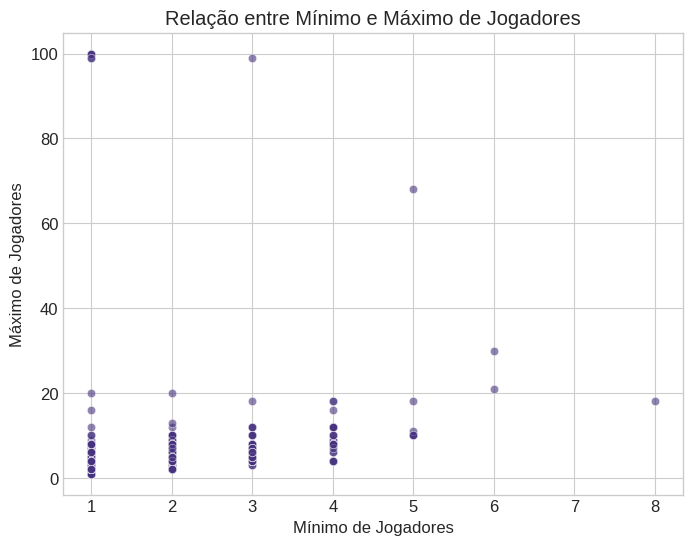

In [ ]:
# D-1
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='min_players', y='max_players', alpha=0.6)

plt.title('Relação entre Mínimo e Máximo de Jogadores')
plt.xlabel('Mínimo de Jogadores')
plt.ylabel('Máximo de Jogadores')
plt.grid(True)
plt.show()

In [ ]:
# D-2
# A correlação é positiva, mas não perfeitamente linear. Jogos com mais jogadores mínimos geralmente permitem também mais jogadores máximos

In [ ]:
# D-3
# Calcula a matriz de correlação das colunas numéricas
corr_matrix = df.corr(numeric_only=True)

print("Matriz de correlação:\n", corr_matrix)

Matriz de correlação:
                      row_id  release_year  min_players  max_players  \
row_id             1.000000     -0.014429     0.043090     0.005884   
release_year      -0.014429      1.000000    -0.068804    -0.181897   
min_players        0.043090     -0.068804     1.000000     0.098884   
max_players        0.005884     -0.181897     0.098884     1.000000   
min_playtime      -0.037907      0.005583     0.021599    -0.039336   
max_playtime      -0.060282      0.003039    -0.104290    -0.038726   
minimum_age       -0.179940      0.119558    -0.141552    -0.097742   
avg_rating        -0.477495      0.060397    -0.254746    -0.044696   
num_ratings       -0.509106     -0.030488     0.076977     0.035725   
complexity        -0.222102      0.004491    -0.231912    -0.116246   
rank_overall       0.999998     -0.014435     0.043144     0.005868   
owned             -0.487035     -0.021210     0.049335     0.035908   
wishlisted        -0.645814      0.033893    -0.074385

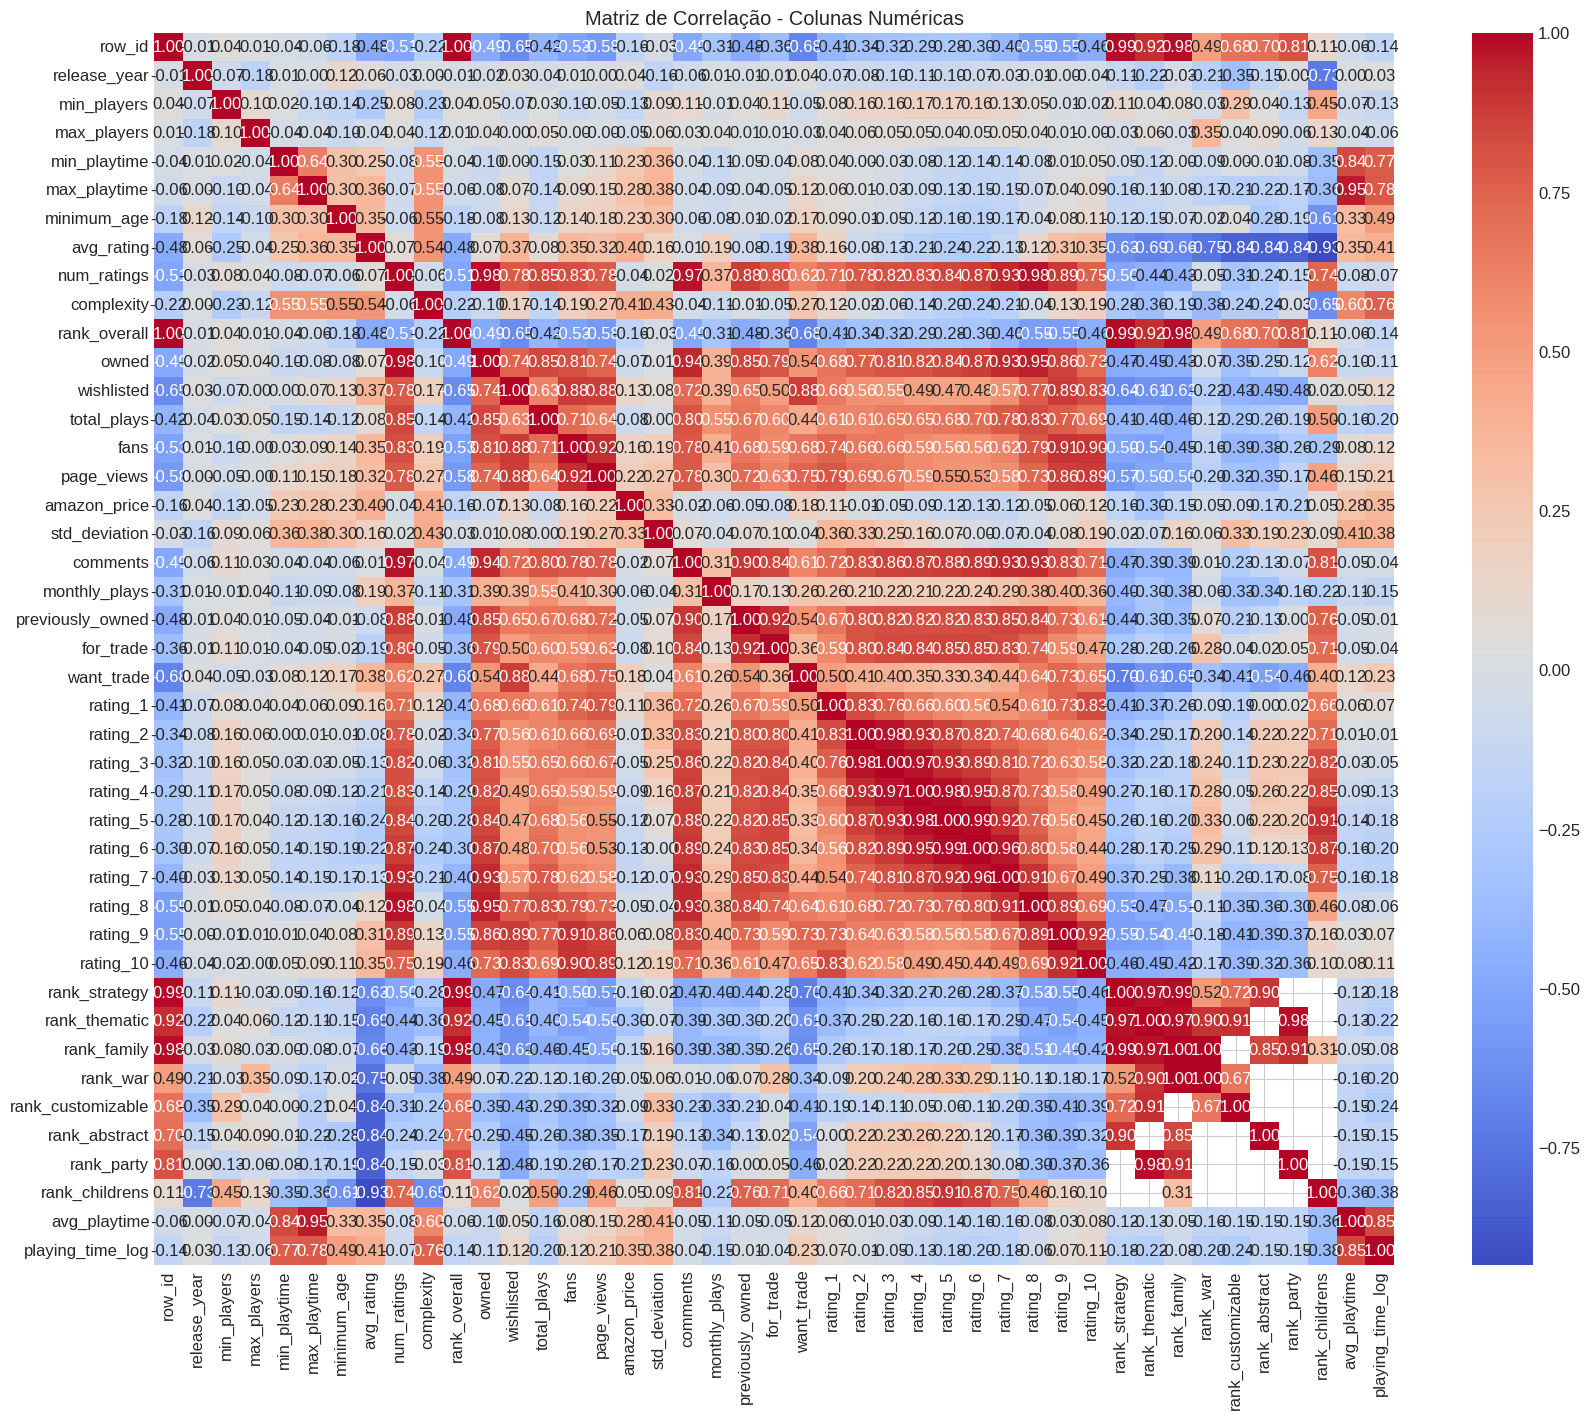

In [ ]:
# D-4
# Visualiza a matriz como um heatmap para facilitar interpretação
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação - Colunas Numéricas")
plt.show()

In [ ]:
# D-5
# Comentários sobre a matriz de correlação:
# 1. O par de colunas numéricas com a maior correlação positiva aparente é:
#    'rating_9' e 'rating_10' (correlação ≈ 0.99), indicando que essas duas colunas variam quase que de forma linear juntas.

# 2. O par de colunas numéricas cuja correlação está mais próxima de zero é:
#    'release_year' e 'min_playtime' (correlação ≈ 0.01), indicando praticamente nenhuma relação linear entre essas variáveis.

In [ ]:
# E-1
print(df['release_year'].head())

0    2018
1    2015
2    2021
3    2017
4    2017
Name: release_year, dtype: int64


In [ ]:
# E-2
df['Decada'] = (df['release_year'] // 10) * 10

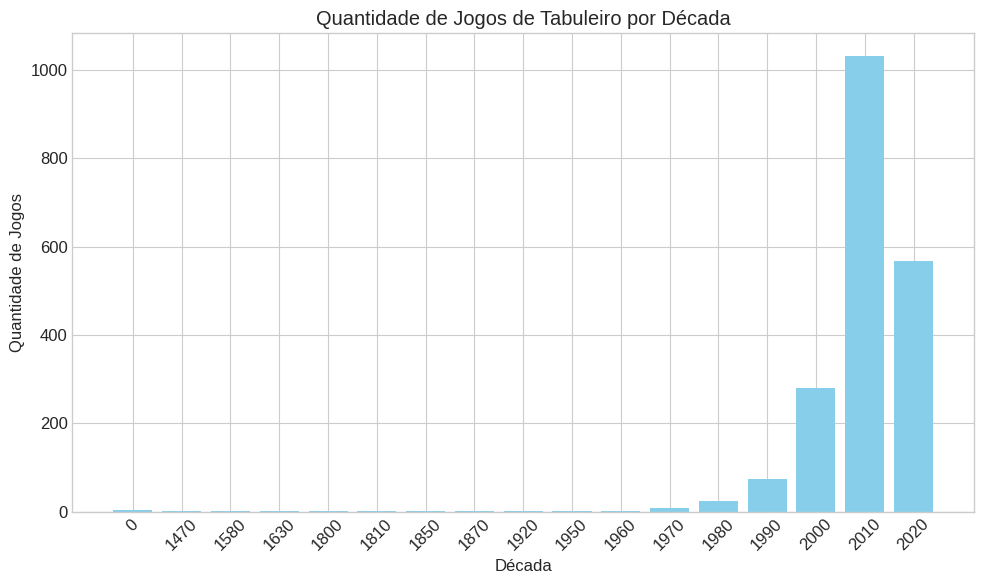

In [ ]:
# E-3
# Agrupar por década e contar a quantidade de jogos
contagem_por_decada = df.groupby('Decada').size().reset_index(name='Quantidade')

plt.figure(figsize=(10,6))
plt.bar(contagem_por_decada['Decada'].astype(str), contagem_por_decada['Quantidade'], color='skyblue')
plt.xlabel('Década')
plt.ylabel('Quantidade de Jogos')
plt.title('Quantidade de Jogos de Tabuleiro por Década')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# E-4
#1 A década com o maior número de lançamentos foi a de 2010,
#2 com aproximadamente mais de 1000 jogos lançados nesse período.